In [1]:
# Importing necessary packages
import os # enable interaction with the operating system
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, auc, average_precision_score
import math

In [2]:
# Read data from Excel
data = pd.read_excel(r'C:\Users\sinth\Desktop\House prices\Data_DecisionTree.xlsx') 
print(data.head())


   Qual  Area   Price
0     7  1710  0.2085
1     6  1262  0.1815
2     7  1786  0.2235
3     7  1717  0.1400
4     8  2198  0.2500


In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800]
val = data.iloc[1801:2400]
test = data.iloc[2401:]
print(train.shape,val.shape,test.shape)

(1800, 3) (599, 3) (507, 3)


In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val,X_test = train.drop('Price', axis=1), val.drop('Price', axis=1), test.drop('Price', axis=1)
y_train, y_val,y_test = train[['Price']], val[['Price']], test[['Price']] 

In [5]:
X_train.columns = ['Qual','Area']


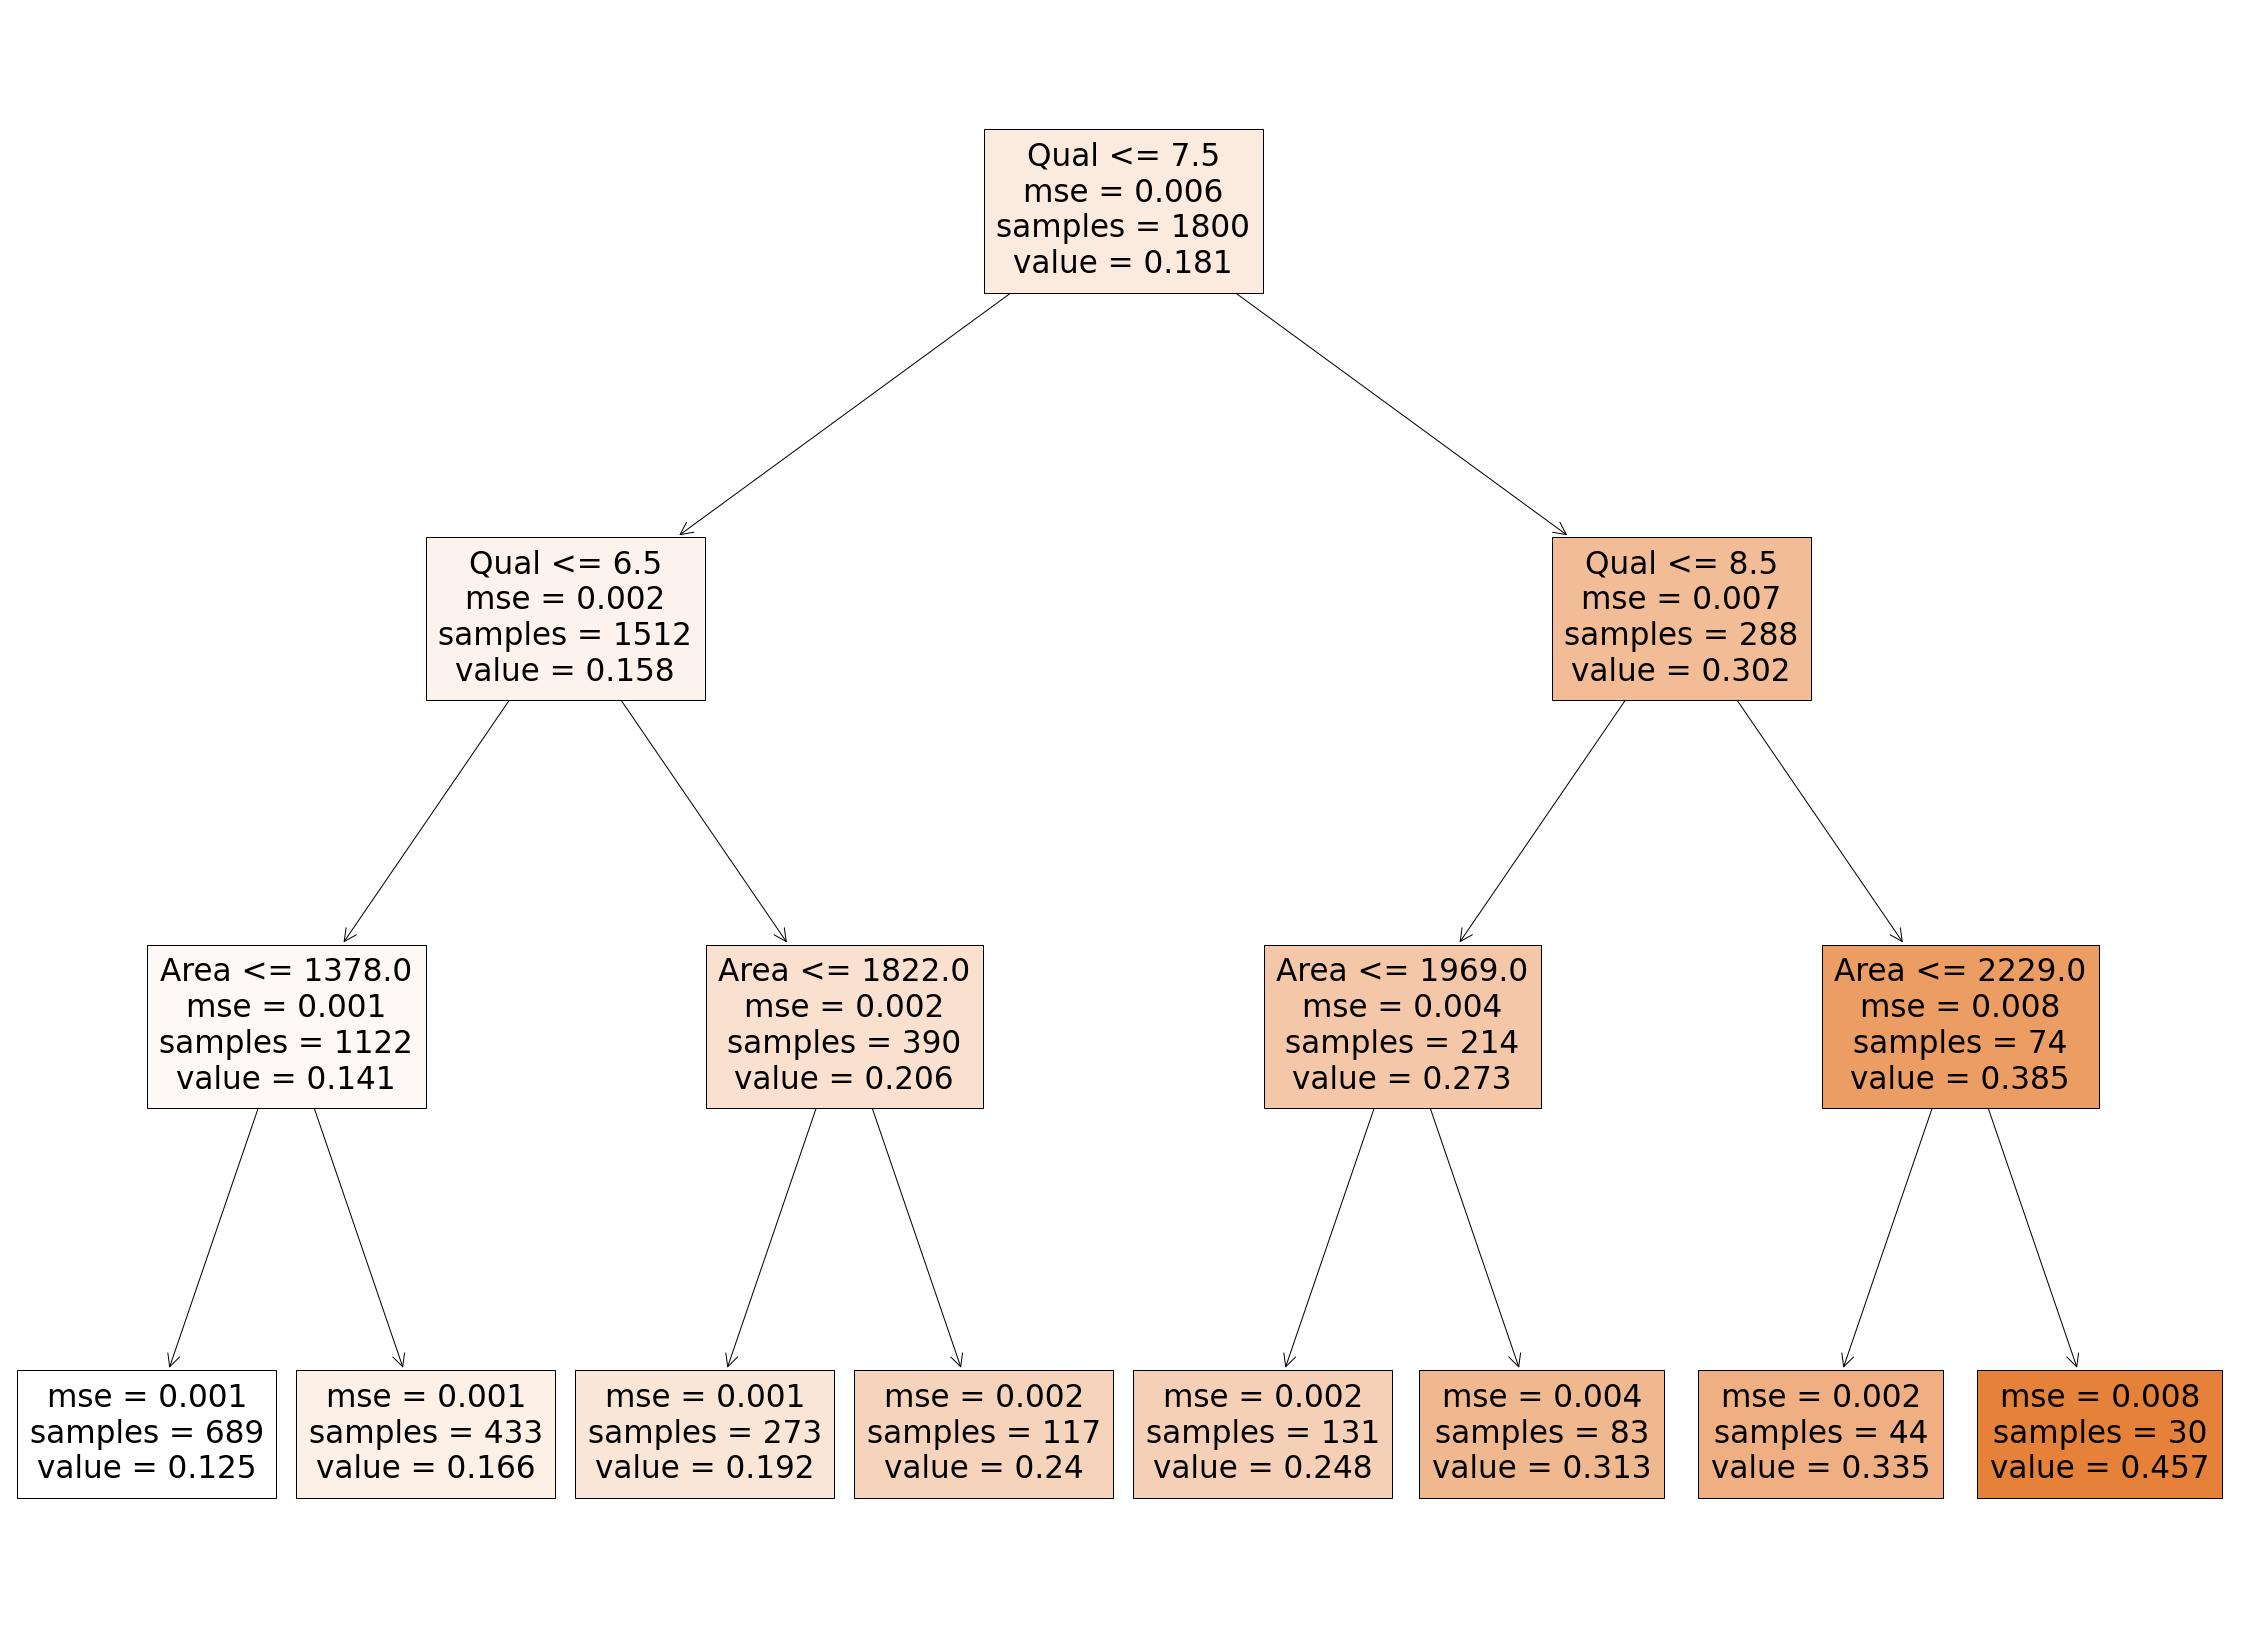

In [6]:
model = DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
model = model.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(model, filled=True, feature_names=X_train.columns, proportion=False)
plt.show()

In [7]:
r = export_text(model,feature_names=['Qual','Area']) 


In [8]:
print(r)


|--- Qual <= 7.50
|   |--- Qual <= 6.50
|   |   |--- Area <= 1378.00
|   |   |   |--- value: [0.13]
|   |   |--- Area >  1378.00
|   |   |   |--- value: [0.17]
|   |--- Qual >  6.50
|   |   |--- Area <= 1822.00
|   |   |   |--- value: [0.19]
|   |   |--- Area >  1822.00
|   |   |   |--- value: [0.24]
|--- Qual >  7.50
|   |--- Qual <= 8.50
|   |   |--- Area <= 1969.00
|   |   |   |--- value: [0.25]
|   |   |--- Area >  1969.00
|   |   |   |--- value: [0.31]
|   |--- Qual >  8.50
|   |   |--- Area <= 2229.00
|   |   |   |--- value: [0.34]
|   |   |--- Area >  2229.00
|   |   |   |--- value: [0.46]



In [9]:
print(val.head())

      Qual  Area   Price
1801     6  1378  0.1289
1802     6  1944  0.1035
1803     5  1306  0.1300
1804     5  1464  0.1290
1805     5  1558  0.1500


In [10]:
print(test.head())

      Qual  Area    Price
2401     5  1144  0.12000
2402     6  1721  0.17485
2403     5   922  0.11600
2404     5  1411  0.13000
2405     5  1216  0.12950


In [11]:
y_pred_train=model.predict(X_train)
mse = mean_squared_error(y_pred_train,y_train)
rmse=math.sqrt(mse)
rmse1=math.sqrt(mse)*1000
print("rmse for training set")
print(rmse)
print(rmse1)

rmse for training set
0.038660405648678585
38.660405648678584


In [19]:
y_pred_test=model.predict(X_test)
mse = mean_squared_error(y_pred_test,y_test)
rmse=math.sqrt(mse)
rmse1=math.sqrt(mse)*1000
print("rmse for test set")
print(rmse)
print(rmse1)

rmse for test set
0.039080310588163296
39.08031058816329


In [29]:
# remove target column to create feature only dataset
X_validation = val.drop('Price',axis=1)
# store target column
y_validation = val['Price']
print(X_validation.shape, y_validation.shape)

y_pred_validation=model.predict(X_validation)
mse = mean_squared_error(y_pred_validation,y_validation)
rmse=math.sqrt(mse)
print("rmse for validation set")
rmse1=math.sqrt(mse)*1000
print(rmse)
print(rmse1)

(599, 2) (599,)
rmse for validation set
0.040495747286624216
40.495747286624216
